# Practice

Source — [Data Science Workbook - Census Income Dataset](https://github.com/dformoso/sklearn-classification/blob/master/Data%20Science%20Workbook%20-%20Census%20Income%20Dataset.ipynb)

## Libraries import

In [90]:
# !conda install --yes -c conda-forge missingno

In [91]:
import io, os, sys, types, time, datetime, math, random, requests, subprocess, tempfile #, StringIO

In [92]:
# Data Manipulation 
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from pandas.plotting import scatter_matrix

# Plot the Figures Inline
%matplotlib inline

from pylab import rcParams
#rcParams['figure.figsize'] = 8,4
# %config InlineBackend.figure_format = 'svg' 

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')




In [211]:
sns.set(font_scale=2)

style = {"grid.color": "0.1",
         'axes.grid': False,
         'axes.spines.bottom': False,
         'axes.spines.left': True,
         'axes.spines.right': False,
         'axes.spines.top': False}

sns.set_style(style)

## Data Download

Загрузить данные в папку "dataset". Чтобы не загружать каждый раз при исполнении кода, оборачиваем загрузку в функцию и после первого вызова закоментируем вызов.  

После загрузки, будем загружать данные с диска в память в dataframe.

##### Docs

**os.mkdir**(path, mode=0o777, *, dir_fd=None)  
    Create a directory named path with numeric mode mode.
    
**os.path.basename**(path)  
Return the base name of pathname path. This is the second element of the pair returned by passing path to the function split(). Note that the result of this function is different from the Unix basename program; where basename for '/foo/bar/' returns 'bar', the basename() function returns an empty string ('').

[os.path](https://docs.python.org/3/library/os.path.html#module-os.path)  

[requests library](https://2.python-requests.org/en/master/user/quickstart/)

In [93]:
# Download
DATASET = (
    "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
    "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names",
    "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test",
)

def download_data(path = 'dataset', urls = DATASET):
    if not os.path.exists(path):
        os.mkdir(path)
        
    for url in urls:
        response = requests.get(url)   # get url
        name = os.path.basename(url)   # get name of the loaded file
        
        with open(os.path.join(path, name), "w") as f:
            f.write(response.text)     # changed .content for .text
            
# download_data() # commented afer first usage
            

У данных нет заголовков. Нужно писать руками.

In [94]:
# check the loaded data
training_raw = pd.read_csv("dataset/adult.data")

training_raw.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [95]:
headers = ['age', 'workclass', 'fnlwgt', 
           'education', 'education-num', 
           'marital-status', 'occupation', 
           'relationship', 'race', 'sex', 
           'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 
           'predclass']

na_list = ['?', " ?"]

training_raw = pd.read_csv("dataset/adult.data"
                          , header = None
                          , names = headers 
                          , na_values = na_list          #Additional strings to recognize as NA/NaN
                          , engine = 'python'
                          )

test_raw = pd.read_csv("dataset/adult.test"
                          , header = None
                          , names = headers 
                          , na_values= na_list 
                          , engine = 'python'
                          , skiprows = 1
                          )

test_raw.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
16280,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.


In [96]:
training_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    31978 non-null object
predclass         32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [97]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         15318 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education-num     16281 non-null int64
marital-status    16281 non-null object
occupation        15315 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital-gain      16281 non-null int64
capital-loss      16281 non-null int64
hours-per-week    16281 non-null int64
native-country    16007 non-null object
predclass         16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [98]:
# join datasets

dataset_raw = training_raw.append(test_raw)
dataset_raw.reset_index(inplace = True, drop = True)

print(dataset_raw.shape)

dataset_raw.tail()

(48842, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
48841,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.


In [99]:
obj_cols = dataset_raw.select_dtypes(include = ["O"]).columns

dataset_raw[obj_cols] = dataset_raw[obj_cols].applymap(lambda x: (str(x).strip()) if (x == x) else x)

dataset_raw[dataset_raw["workclass"].isna()][obj_cols].head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,predclass
27,NaN,Some-college,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,South,>50K
61,NaN,7th-8th,Married-spouse-absent,NaN,Not-in-family,White,Male,NaN,<=50K
69,NaN,Some-college,Never-married,NaN,Own-child,White,Male,United-States,<=50K
77,NaN,10th,Married-civ-spouse,NaN,Husband,White,Male,United-States,<=50K
106,NaN,10th,Never-married,NaN,Own-child,White,Female,United-States,<=50K


Конвертация размера датафрейма.  

На входе количество байт, на выходе — красивое число с двумя знаками после запятой и единицами измерения (математическая магия)

In [100]:
# Displaying the size of the Dataframe in Memory
def convert_size(size_bytes):
    if size_bytes == 0:
        return "0B"
    
    size_name = ("Bytes", "KB", "MB", "GB", "TB")
    
    i = int(math.floor(math.log(size_bytes, 1024)))

    p = math.pow(1024, i)

    s = round(size_bytes / p, 2)

    return "%s %s" % (s, size_name[i])

convert_size(dataset_raw.memory_usage().sum())


'5.59 MB'

## Одномерный анализ

При изучении нашего набора данных и его признаков у нас есть много доступных вариантов. Мы можем исследовать каждый призанк по отдельности или сравнивать пары, найдя корреляцию между ними. Начнём с простого анализа одного признака.

Признаки могут быть разных типов:

- Номинал: предназначен для взаимоисключающих, но не упорядоченных категорий.
- Обычный: важен порядок, но не разница между значениями.
- Интервал: измерение, при котором разница между двумя значениями имеет значение.
- Соотношение: имеет все свойства интервальной переменной, а также имеет четкое определение 0,0.

Существует несколько способов манипулирования каждым типом объектов, но для простоты мы определим только два типа объектов:
- Числовые: любой признак, содержащий числовые значения.
- Категориальные: любая функция, содержащая категории или текст.

In [101]:
# i = dataset_raw[dataset_raw["age"] == "|1x3 Cross validator"].index.to_list()

# dataset_raw.drop(i, axis = 0, inplace = True)

# ataset_raw["age"] = dataset_raw["age"].astype("int64")

In [102]:
# basic stats for the dataset
dataset_raw.describe().style.format("{:.2f}")

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.00,48842.00,48842.00,48842.00,48842.00,48842.00
mean,38.64,189664.13,10.08,1079.07,87.50,40.42
std,13.71,105604.03,2.57,7452.02,403.00,12.39
min,17.00,12285.00,1.00,0.00,0.00,1.00
25%,28.00,117550.50,9.00,0.00,0.00,40.00
50%,37.00,178144.50,10.00,0.00,0.00,40.00
75%,48.00,237642.00,12.00,0.00,0.00,45.00
max,90.00,1490400.00,16.00,99999.00,4356.00,99.00


In [103]:
dataset_raw.describe(include = ["O"])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,predclass
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,24720


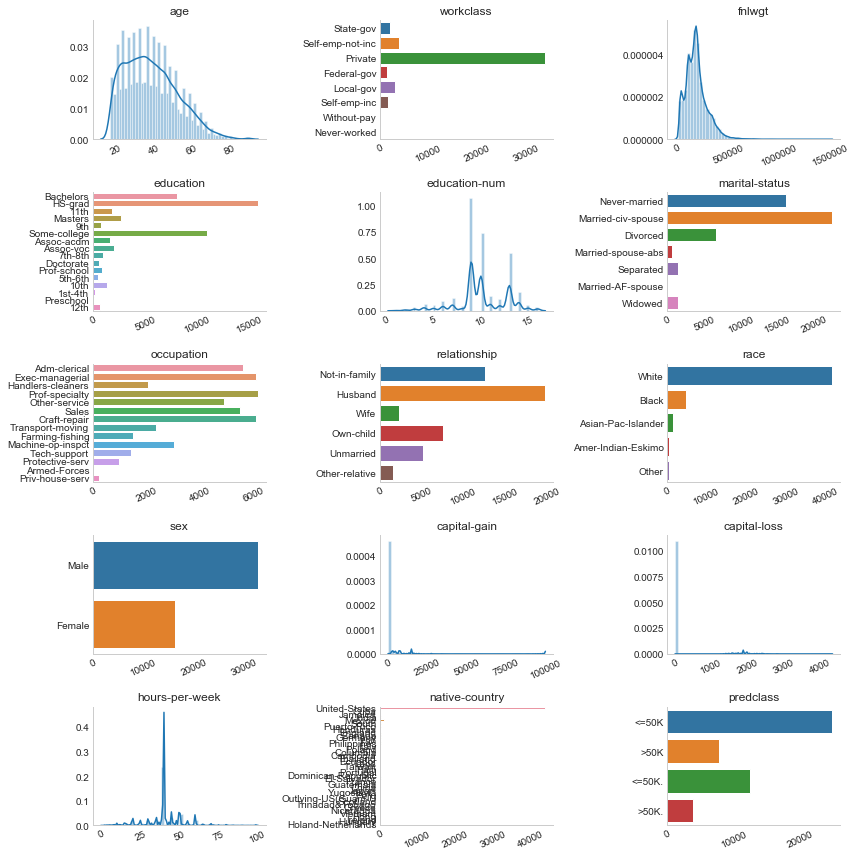

In [104]:
# plot
def plot_distribution(dataset, cols = 5, 
                     width = 20, height = 15,
                     hspace = .2, wspace = .5):
    
    plt.style.use("seaborn-whitegrid")
    
    fig = plt.figure(figsize = (width, height))
    
    fig.subplots_adjust(left = None, bottom = None, 
                        right = None, top = None, 
                        wspace = wspace, hspace = hspace)
    
    # number of rows to draw charts is
    # total number of df.columns to draw devided by desired number of columns
    rows = math.ceil(float(dataset.shape[1] / cols))
    
    for i, column in enumerate(dataset.columns):

        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        
        # draw a countplot for objects types and distplot for numbers
        if dataset[column].dtype == np.object: 
            g = sns.countplot(y = column, data = dataset)
        
            substrings = [ytick.get_text()[:18] for ytick in g.get_yticklabels()]
            g.set(yticklabels = substrings)
            
        else:
            g = sns.distplot(dataset[column])
        
        plt.xticks(rotation = 25)
        
        sns.despine()
        ax.grid(False)
        
        ax.set_xlabel("")
        ax.set_ylabel("")
        
        plt.tight_layout()
            
plot_distribution(dataset_raw, cols = 3,
                  width = 12, height = 12,
                  hspace = .5, wspace = .5)
    

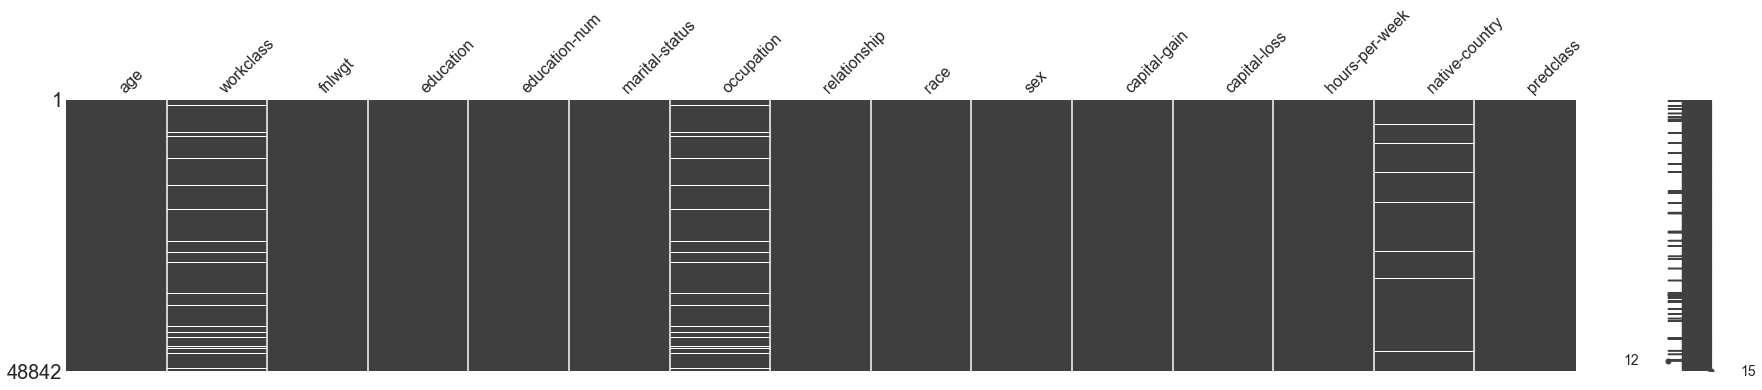

In [105]:
missingno.matrix(dataset_raw, figsize = (30, 5))

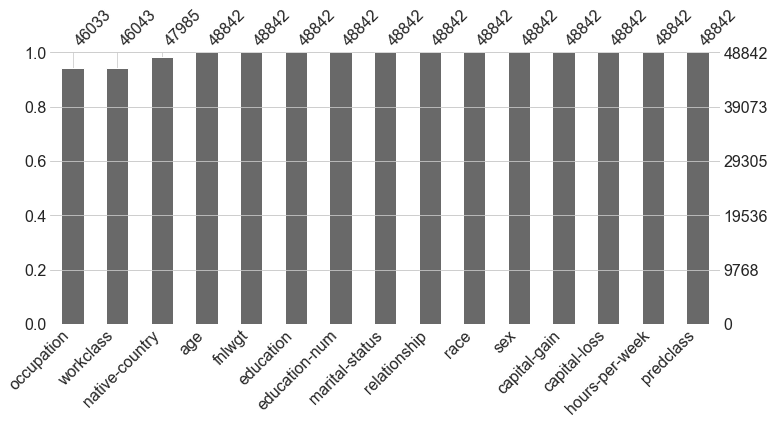

In [106]:
missingno.bar(dataset_raw, sort = "ascending", figsize = (12,5))

# Очистка, обработка и заполнение данных
Feature Cleaning, Engineering, and Imputation

**Очистка**: чтобы очистить  данные, нам понадобится работать с:

- **Пропуски в данных**: Либо опустить элементы из набора данных, которые содержат недостающие значения, либо вменить их (заполнить их).

- **Специальные значения**: Численные переменные имеют несколько формализованных специальных значений, включая ±Inf, NA и NaN. Расчеты со специальными значениями часто приводят к получению специальных значений, которые необходимо обрабатывать/очищать.

- **Выбросы**: Они должны быть обнаружены, но не обязательно удалены. Их включение в анализ является статистическим решением.

- **Очевидные несоответствия**: Возраст не может быть отрицательным, мужчина не может быть беременным, а несовершеннолетний не может иметь водительские права. Найдите несоответствия и спланируйте их устранение.


In [107]:
# To perform our data analysis, let's create new dataframes.
dataset_bin = pd.DataFrame() # To contain our dataframe with our discretised continuous variables 
dataset_con = pd.DataFrame() # To contain our dataframe with our continuous variables 

## Признак: predclass

In [178]:
# Let's fix the Class Feature
dataset_raw.loc[dataset_raw['predclass'] == '>50K', 'predclass'] = 1
dataset_raw.loc[dataset_raw['predclass'] == '>50K.', 'predclass'] = 1
dataset_raw.loc[dataset_raw['predclass'] == '<=50K', 'predclass'] = 0
dataset_raw.loc[dataset_raw['predclass'] == '<=50K.', 'predclass'] = 0

dataset_bin['predclass'] = dataset_raw['predclass'].astype("object")
dataset_con['predclass'] = dataset_raw['predclass'].astype("object")

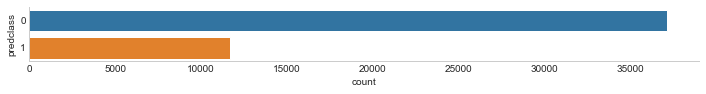

In [179]:
fig = plt.figure(figsize = (12, 1))
ax = sns.countplot(y = "predclass", data = dataset_bin)

ax.grid(False)
sns.despine()
plt.show()


## Признак: age

In [112]:
column = "age"
dataset_bin[column] = pd.cut(dataset_raw[column], 10)
dataset_con[column] = dataset_raw[column]

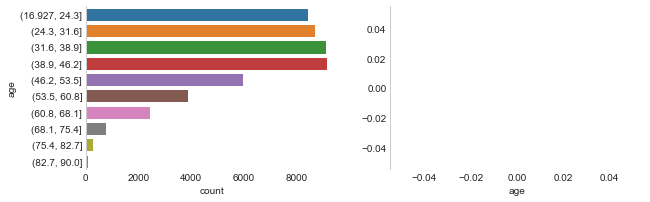

In [113]:
fig = plt.figure(figsize = (10, 3))

plt.subplot(1, 2, 1)
sns.countplot(y = "age", data = dataset_bin)

plt.subplot(1, 2, 2)
sns.distplot(dataset_con[dataset_con["predclass"] == 1]["age"], kde_kws = {"label": ">$50K"})
sns.distplot(dataset_con[dataset_con["predclass"] == 0]["age"], kde_kws = {"label": "<$50K"})

# plt.tight_layout()

plt.show()

## Признак: workclass

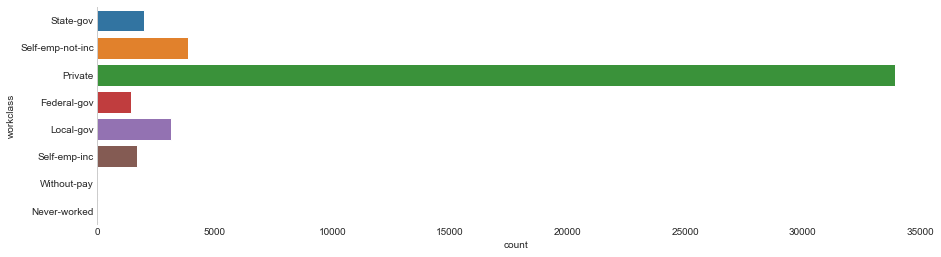

In [114]:
plt.figure(figsize = (15, 4))
sns.countplot(y = "workclass", data = dataset_raw)


In [115]:
# There are too many groups here, we can group someof them together.
# Create buckets for Workclass
dataset_raw.loc[dataset_raw['workclass'] == 'Without-pay', 'workclass'] = 'Not Working'
dataset_raw.loc[dataset_raw['workclass'] == 'Never-worked', 'workclass'] = 'Not Working'
dataset_raw.loc[dataset_raw['workclass'] == 'Federal-gov', 'workclass'] = 'Fed-gov'
dataset_raw.loc[dataset_raw['workclass'] == 'State-gov', 'workclass'] = 'Non-fed-gov'
dataset_raw.loc[dataset_raw['workclass'] == 'Local-gov', 'workclass'] = 'Non-fed-gov'
dataset_raw.loc[dataset_raw['workclass'] == 'Self-emp-not-inc', 'workclass'] = 'Self-emp'
dataset_raw.loc[dataset_raw['workclass'] == 'Self-emp-inc', 'workclass'] = 'Self-emp'

dataset_bin['workclass'] = dataset_raw['workclass']
dataset_con['workclass'] = dataset_raw['workclass']

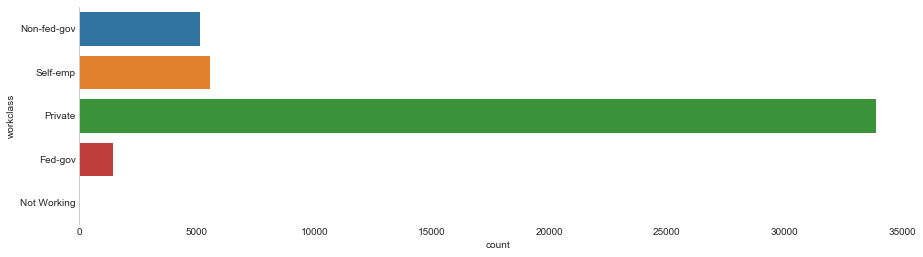

In [116]:
plt.figure(figsize = (15, 4))
sns.countplot(y = "workclass", data = dataset_bin)


## Признак: occupation

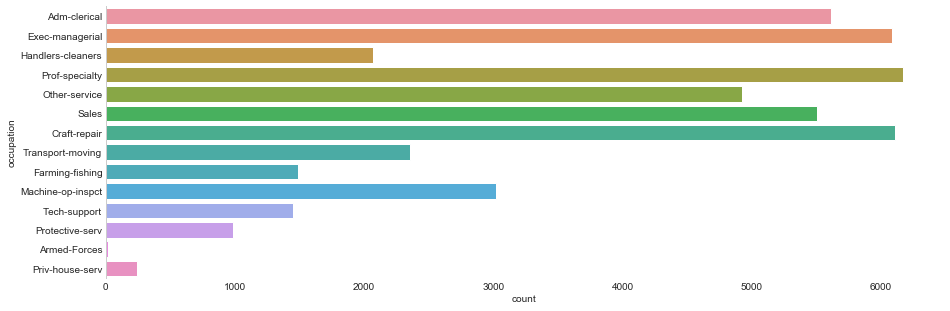

In [119]:
plt.figure(figsize = (15, 5))
sns.countplot(y = "occupation", data = dataset_raw)
plt.show()

In [120]:
# Create buckets for Occupation
dataset_raw.loc[dataset_raw['occupation'] == 'Adm-clerical', 'occupation'] = 'Admin'
dataset_raw.loc[dataset_raw['occupation'] == 'Armed-Forces', 'occupation'] = 'Military'
dataset_raw.loc[dataset_raw['occupation'] == 'Craft-repair', 'occupation'] = 'Manual Labour'
dataset_raw.loc[dataset_raw['occupation'] == 'Exec-managerial', 'occupation'] = 'Office Labour'
dataset_raw.loc[dataset_raw['occupation'] == 'Farming-fishing', 'occupation'] = 'Manual Labour'
dataset_raw.loc[dataset_raw['occupation'] == 'Handlers-cleaners', 'occupation'] = 'Manual Labour'
dataset_raw.loc[dataset_raw['occupation'] == 'Machine-op-inspct', 'occupation'] = 'Manual Labour'
dataset_raw.loc[dataset_raw['occupation'] == 'Other-service', 'occupation'] = 'Service'
dataset_raw.loc[dataset_raw['occupation'] == 'Priv-house-serv', 'occupation'] = 'Service'
dataset_raw.loc[dataset_raw['occupation'] == 'Prof-specialty', 'occupation'] = 'Professional'
dataset_raw.loc[dataset_raw['occupation'] == 'Protective-serv', 'occupation'] = 'Military'
dataset_raw.loc[dataset_raw['occupation'] == 'Sales', 'occupation'] = 'Office Labour'
dataset_raw.loc[dataset_raw['occupation'] == 'Tech-support', 'occupation'] = 'Office Labour'
dataset_raw.loc[dataset_raw['occupation'] == 'Transport-moving', 'occupation'] = 'Manual Labour'

dataset_bin['occupation'] = dataset_raw['occupation']
dataset_con['occupation'] = dataset_raw['occupation']

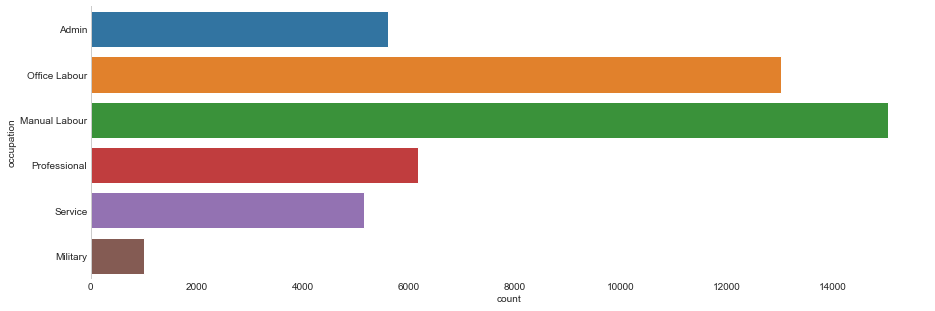

In [121]:
plt.figure(figsize = (15, 5))
sns.countplot(y = "occupation", data = dataset_bin)
plt.show()

## Признак: Native Country

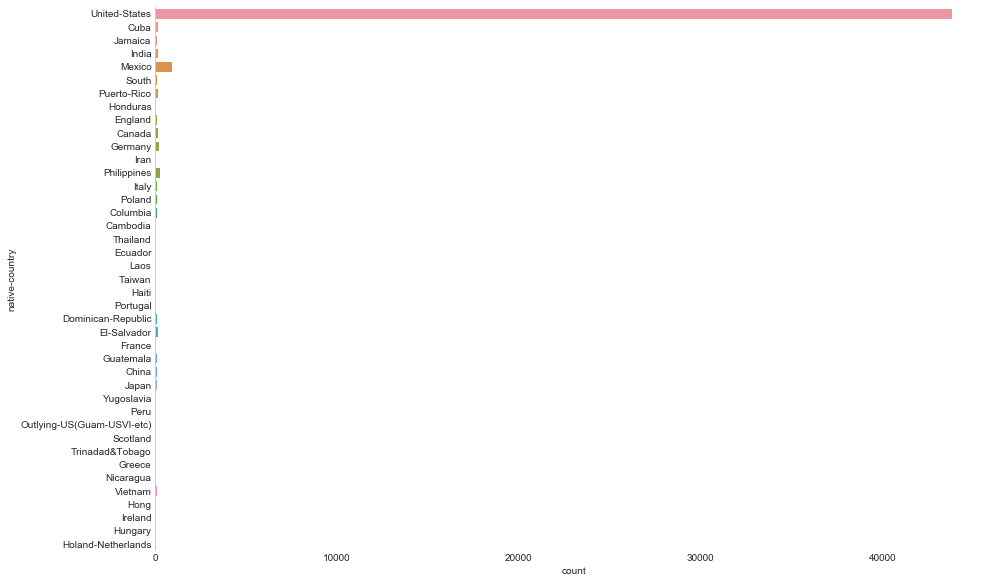

In [122]:
plt.figure(figsize = (15, 10))
sns.countplot(y = "native-country", data = dataset_raw)
plt.show()

In [123]:
dataset_raw.loc[dataset_raw['native-country'] == 'Cambodia'                    , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Canada'                      , 'native-country'] = 'British-Commonwealth'    
dataset_raw.loc[dataset_raw['native-country'] == 'China'                       , 'native-country'] = 'China'       
dataset_raw.loc[dataset_raw['native-country'] == 'Columbia'                    , 'native-country'] = 'South-America'    
dataset_raw.loc[dataset_raw['native-country'] == 'Cuba'                        , 'native-country'] = 'South-America'        
dataset_raw.loc[dataset_raw['native-country'] == 'Dominican-Republic'          , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Ecuador'                     , 'native-country'] = 'South-America'     
dataset_raw.loc[dataset_raw['native-country'] == 'El-Salvador'                 , 'native-country'] = 'South-America' 
dataset_raw.loc[dataset_raw['native-country'] == 'England'                     , 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] == 'France'                      , 'native-country'] = 'Euro_Group_1'
dataset_raw.loc[dataset_raw['native-country'] == 'Germany'                     , 'native-country'] = 'Euro_Group_1'
dataset_raw.loc[dataset_raw['native-country'] == 'Greece'                      , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'Guatemala'                   , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Haiti'                       , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Holand-Netherlands'          , 'native-country'] = 'Euro_Group_1'
dataset_raw.loc[dataset_raw['native-country'] == 'Honduras'                    , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Hong'                        , 'native-country'] = 'China'
dataset_raw.loc[dataset_raw['native-country'] == 'Hungary'                     , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'India'                       , 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] == 'Iran'                        , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'Ireland'                     , 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] == 'Italy'                       , 'native-country'] = 'Euro_Group_1'
dataset_raw.loc[dataset_raw['native-country'] == 'Jamaica'                     , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Japan'                       , 'native-country'] = 'APAC'
dataset_raw.loc[dataset_raw['native-country'] == 'Laos'                        , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Mexico'                      , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Nicaragua'                   , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Outlying-US(Guam-USVI-etc)'  , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Peru'                        , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Philippines'                 , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Poland'                      , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'Portugal'                    , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'Puerto-Rico'                 , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Scotland'                    , 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] == 'South'                       , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'Taiwan'                      , 'native-country'] = 'China'
dataset_raw.loc[dataset_raw['native-country'] == 'Thailand'                    , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Trinadad&Tobago'             , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'United-States'               , 'native-country'] = 'United-States'
dataset_raw.loc[dataset_raw['native-country'] == 'Vietnam'                     , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Yugoslavia'                  , 'native-country'] = 'Euro_Group_2'

dataset_bin['native-country'] = dataset_raw['native-country']
dataset_con['native-country'] = dataset_raw['native-country']

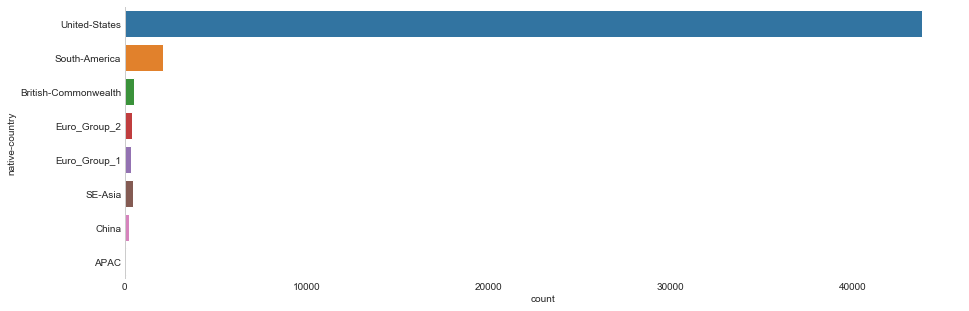

In [125]:
plt.figure(figsize = (15, 5))
sns.countplot(y = "native-country", data = dataset_bin)
plt.show()

## Признак: Education

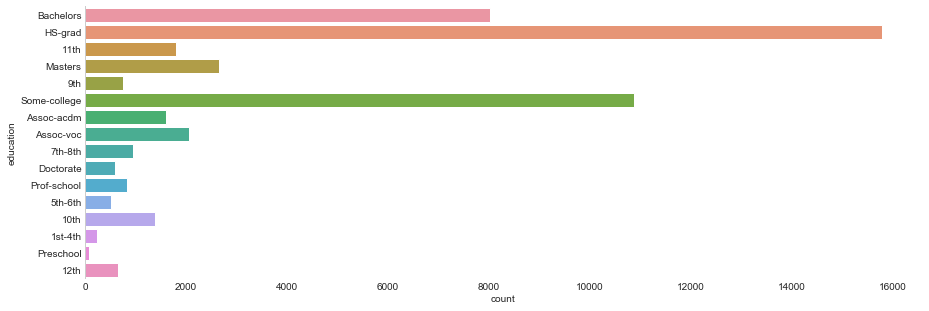

In [126]:
plt.figure(figsize = (15, 5))
sns.countplot(y = "education", data = dataset_raw)
plt.show()

In [127]:
dataset_raw.loc[dataset_raw['education'] == '10th'          , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '11th'          , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '12th'          , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '1st-4th'       , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '5th-6th'       , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '7th-8th'       , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '9th'           , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == 'Assoc-acdm'    , 'education'] = 'Associate'
dataset_raw.loc[dataset_raw['education'] == 'Assoc-voc'     , 'education'] = 'Associate'
dataset_raw.loc[dataset_raw['education'] == 'Bachelors'     , 'education'] = 'Bachelors'
dataset_raw.loc[dataset_raw['education'] == 'Doctorate'     , 'education'] = 'Doctorate'
dataset_raw.loc[dataset_raw['education'] == 'HS-Grad'       , 'education'] = 'HS-Graduate'
dataset_raw.loc[dataset_raw['education'] == 'Masters'       , 'education'] = 'Masters'
dataset_raw.loc[dataset_raw['education'] == 'Preschool'     , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == 'Prof-school'   , 'education'] = 'Professor'
dataset_raw.loc[dataset_raw['education'] == 'Some-college'  , 'education'] = 'HS-Graduate'

dataset_bin['education'] = dataset_raw['education']
dataset_con['education'] = dataset_raw['education']

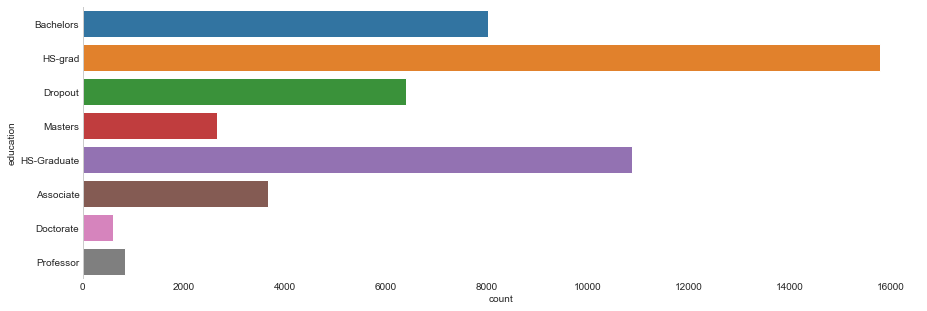

In [128]:
plt.figure(figsize = (15, 5))
sns.countplot(y = "education", data = dataset_bin)
plt.show()

## Признак: Marital Status

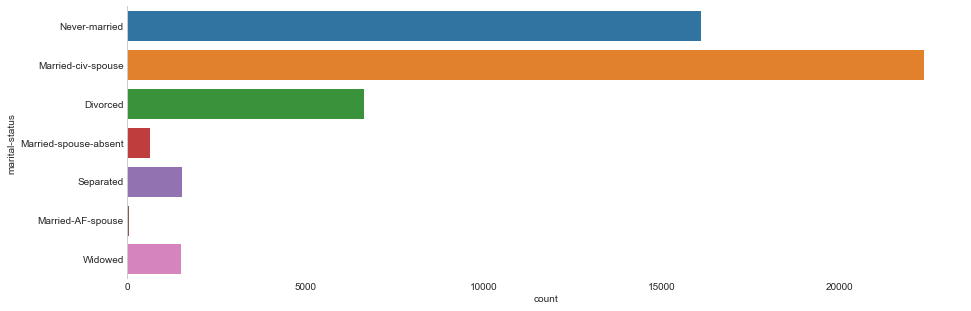

In [129]:
plt.figure(figsize = (15, 5))
sns.countplot(y = "marital-status", data = dataset_raw)
plt.show()

In [130]:
dataset_raw.loc[dataset_raw['marital-status'] == 'Never-married'        , 'marital-status'] = 'Never-Married'
dataset_raw.loc[dataset_raw['marital-status'] == 'Married-AF-spouse'    , 'marital-status'] = 'Married'
dataset_raw.loc[dataset_raw['marital-status'] == 'Married-civ-spouse'   , 'marital-status'] = 'Married'
dataset_raw.loc[dataset_raw['marital-status'] == 'Married-spouse-absent', 'marital-status'] = 'Not-Married'
dataset_raw.loc[dataset_raw['marital-status'] == 'Separated'            , 'marital-status'] = 'Separated'
dataset_raw.loc[dataset_raw['marital-status'] == 'Divorced'             , 'marital-status'] = 'Separated'
dataset_raw.loc[dataset_raw['marital-status'] == 'Widowed'              , 'marital-status'] = 'Widowed'

dataset_bin['marital-status'] = dataset_raw['marital-status']
dataset_con['marital-status'] = dataset_raw['marital-status']

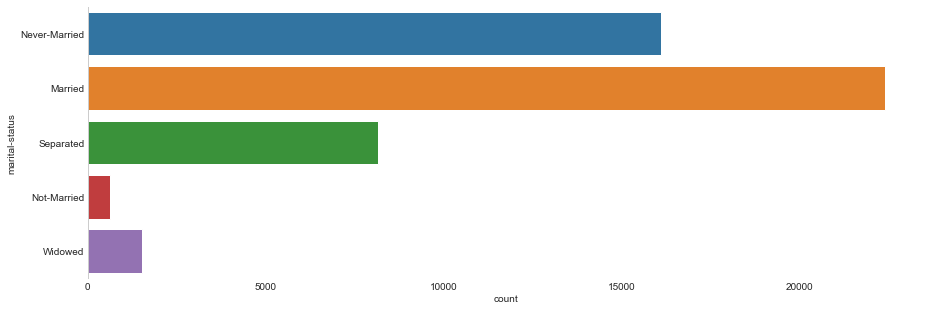

In [131]:
plt.figure(figsize = (15, 5))
sns.countplot(y = "marital-status", data = dataset_bin)
plt.show()

## Признак: Final Weight

In [134]:
dataset_bin["fnlwgt"] = pd.cut(dataset_raw["fnlwgt"], 10)
dataset_con["fnlwgt"] = dataset_raw["fnlwgt"]

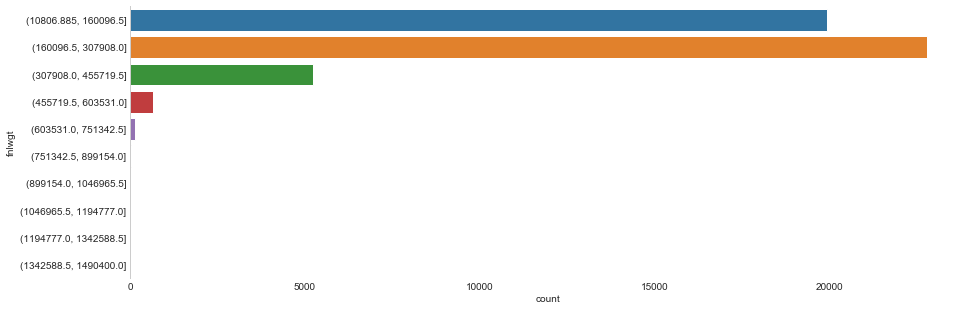

In [135]:
plt.figure(figsize = (15, 5))
sns.countplot(y = "fnlwgt", data = dataset_bin)
plt.show()

## Признак: Education Number

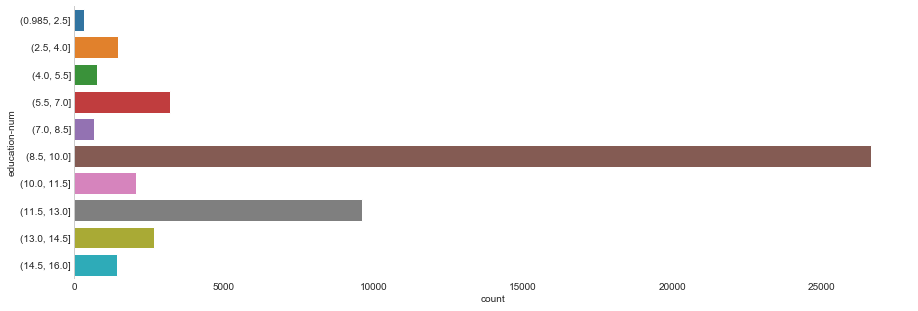

In [137]:
column = "education-num"

dataset_bin[column] = pd.cut(dataset_raw[column], 10)
dataset_con[column] = dataset_raw[column]

plt.figure(figsize = (15, 5))
sns.countplot(y = column, data = dataset_bin)
plt.show()

## Признак: Hours per Week

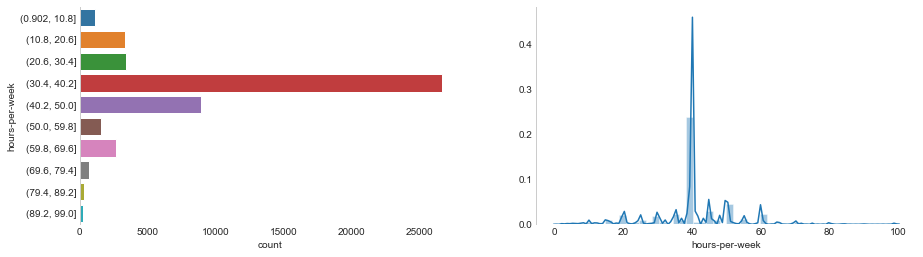

In [140]:
column = "hours-per-week"

dataset_bin[column] = pd.cut(dataset_raw[column], 10)
dataset_con[column] = dataset_raw[column]

fig = plt.figure(figsize = (15, 4))

plt.subplot(121)
sns.countplot(y = column, data = dataset_bin)

plt.subplot(122)
sns.distplot(dataset_con[column])

plt.show()

## Признак: Capital Gain

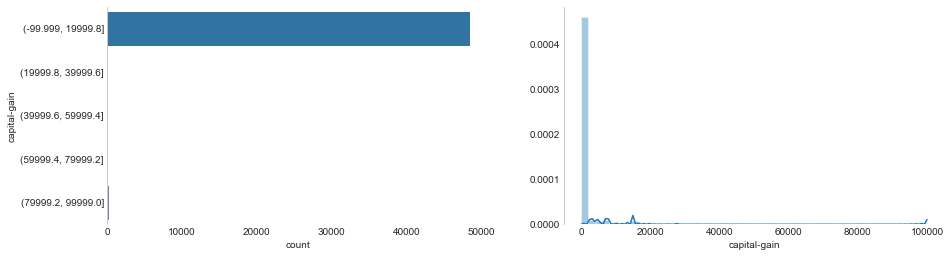

In [142]:
column = "capital-gain"

dataset_bin[column] = pd.cut(dataset_raw[column], 5)
dataset_con[column] = dataset_raw[column]

fig = plt.figure(figsize = (15, 4))

plt.subplot(121)
sns.countplot(y = column, data = dataset_bin)

plt.subplot(122)
sns.distplot(dataset_con[column])

plt.show()

## Признак: Capital Loss

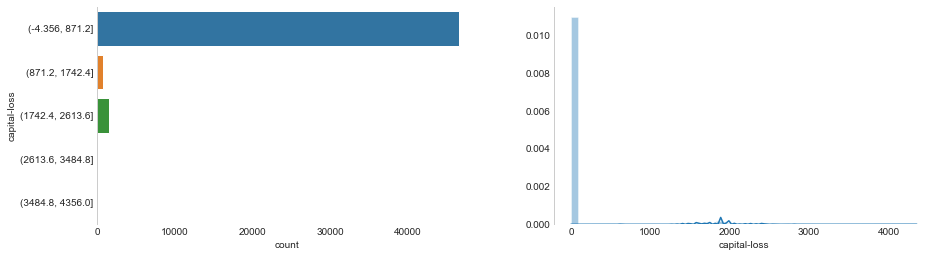

In [143]:
column = "capital-loss"

dataset_bin[column] = pd.cut(dataset_raw[column], 5)
dataset_con[column] = dataset_raw[column]

fig = plt.figure(figsize = (15, 4))

plt.subplot(121)
sns.countplot(y = column, data = dataset_bin)

plt.subplot(122)
sns.distplot(dataset_con[column])

plt.show()

## Признаки: Race, Sex, Relationship

In [144]:
columns = ["sex", "race", "relationship"]

for column in columns:
    dataset_bin[column] = dataset_con[column] = dataset_raw[column]


## Попарный анализ

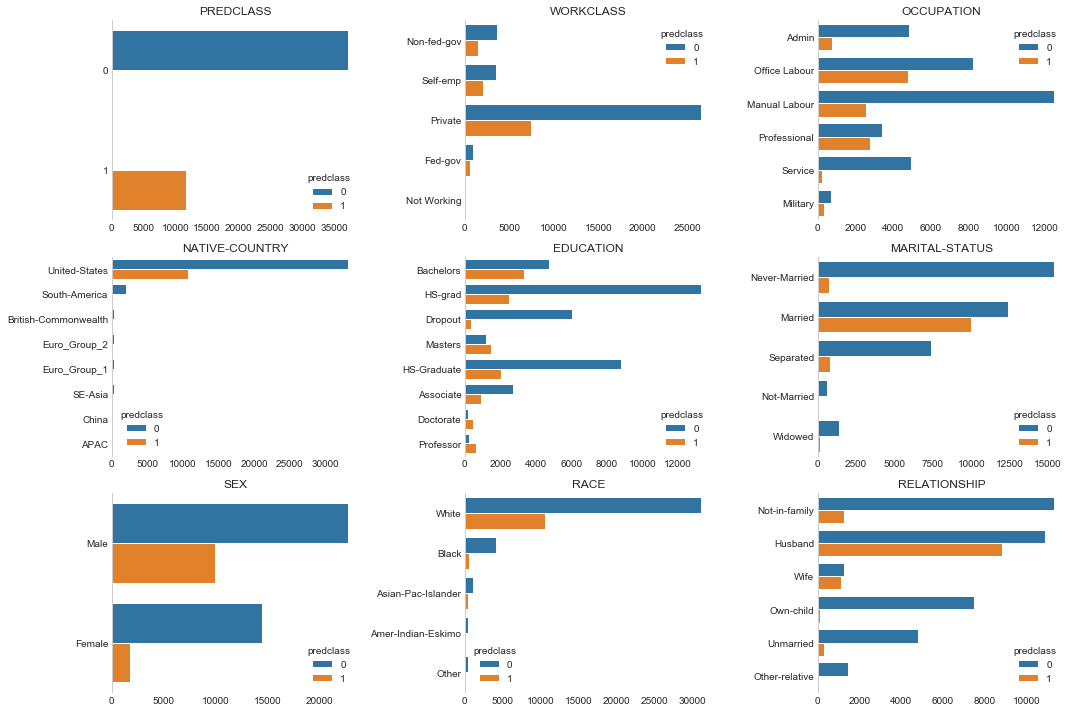

In [185]:

def plot_bivariate_bar(dataset, hue, cols = 5,
                      width = 20, height = 15,
                      hspace = 0.2, wspace = 0.5):
    
    dataset = dataset.select_dtypes(include = ["O"])
    
    fig = plt.figure(figsize = (width, height))
    fig.subplots_adjust(left = None, bottom = None, 
                        right = None, top = None, 
                        wspace = wspace, hspace = hspace)
    
    rows = math.ceil(float(dataset.shape[1] / cols))
    
    for i, column in enumerate(dataset.columns):
        
        ax = fig.add_subplot(rows, cols, i+1)
        
        
        if dataset.dtypes[column] == np.object:
            
            g = sns.countplot(y = column, hue = hue, data = dataset)
          
        ax.set_title(column.upper())
        ax.set_xlabel("")
        ax.set_ylabel("")
        
        plt.tight_layout()
            
plot_bivariate_bar(dataset_con, hue = "predclass", cols = 3,
                      width = 15, height = 10,
                      hspace = 0.4, wspace = 0.8)
    

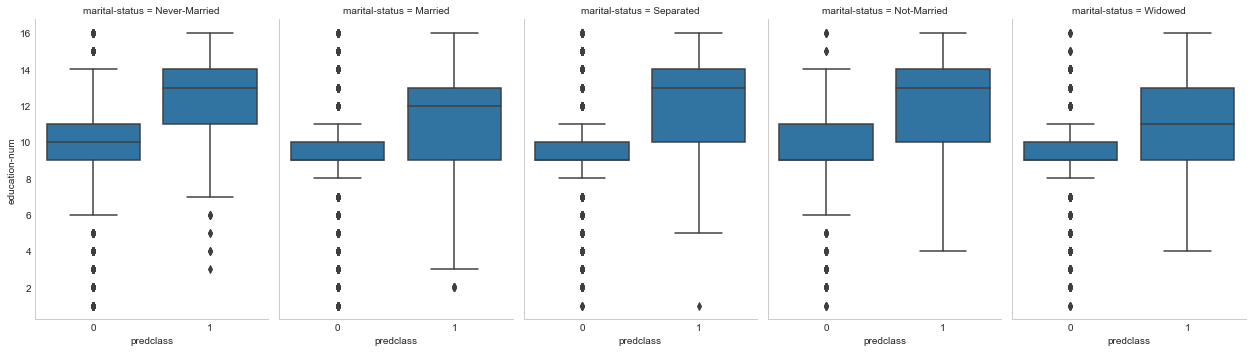

In [187]:
g = sns.FacetGrid(dataset_con, col = "marital-status", 
                  size = 5, aspect = .7)
g = g.map(sns.boxplot, "predclass", "education-num")

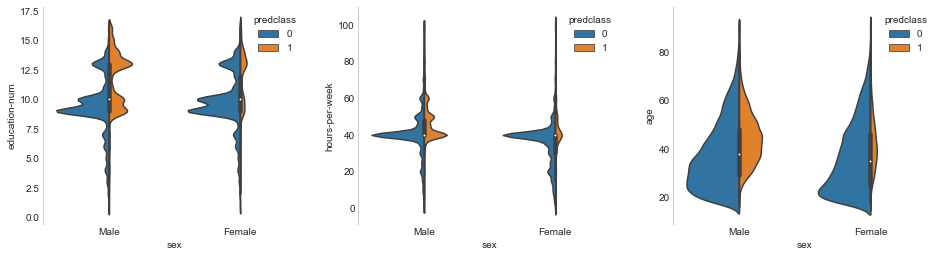

In [194]:
fig = plt.figure(figsize = (16, 4))

plt.subplot(131)
sns.violinplot(x = "sex", y = "education-num", hue = "predclass", 
              data = dataset_con, split = True, scale = "count")

plt.subplot(132)
sns.violinplot(x = "sex", y = "hours-per-week", hue = "predclass", 
              data = dataset_con, split = True, scale = "count")

plt.subplot(133)
sns.violinplot(x = "sex", y = "age", hue = "predclass", 
              data = dataset_con, split = True, scale = "count")


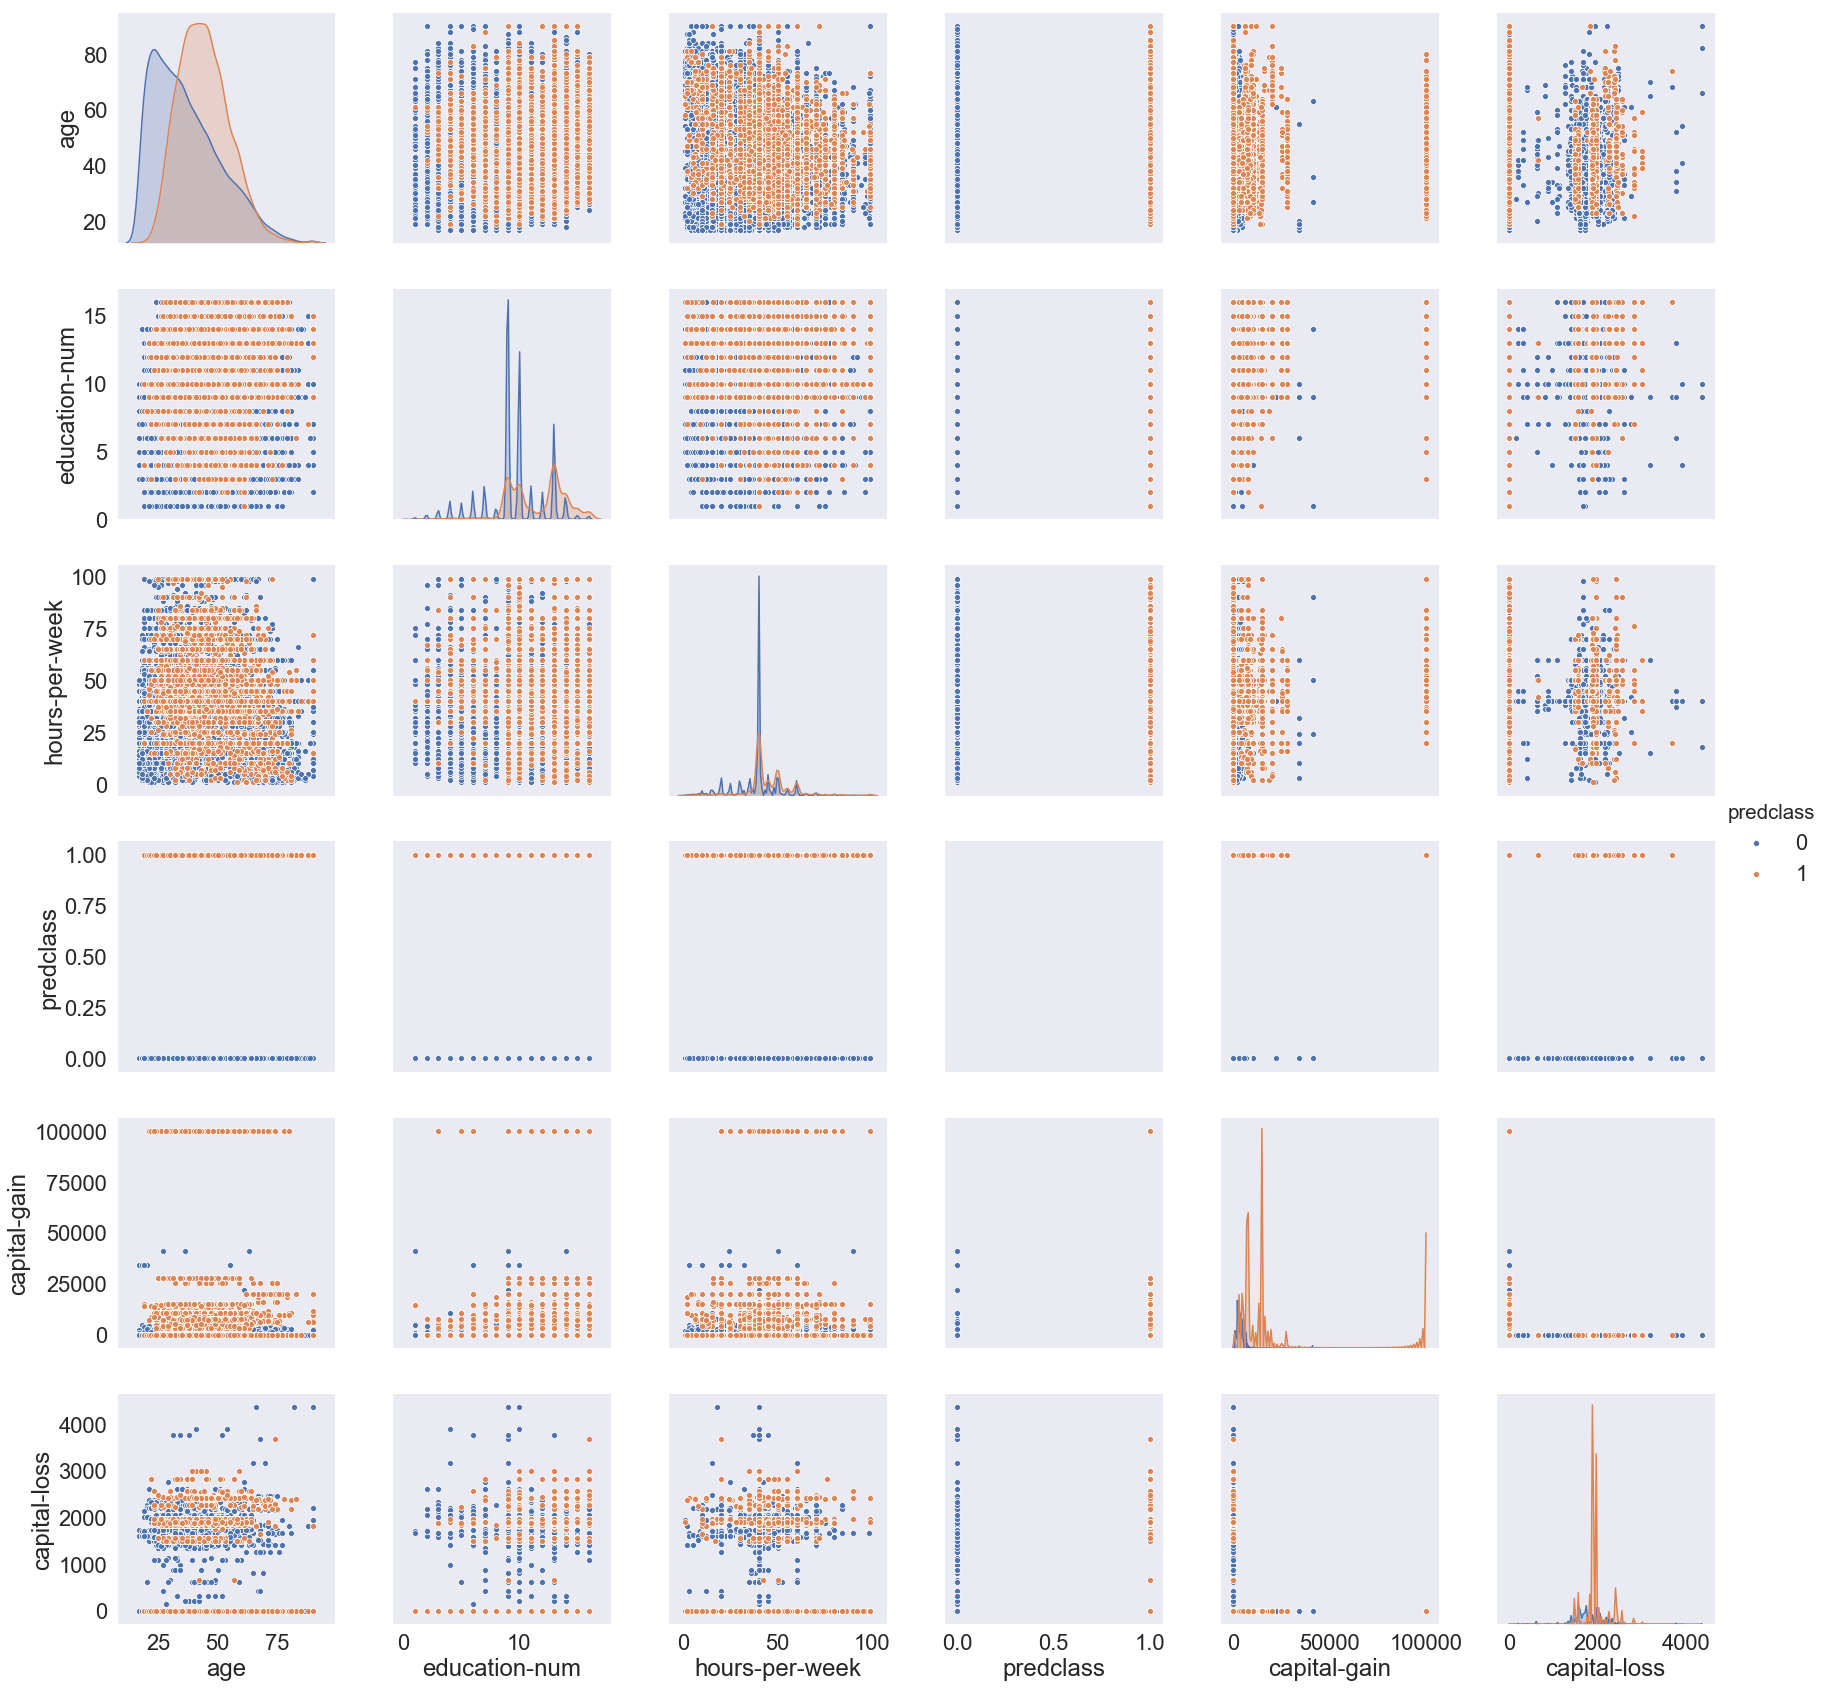

In [214]:
columns = ["age", "education-num", "hours-per-week", "predclass", "capital-gain", "capital-loss"]

g = sns.pairplot(dataset_con[columns], hue = "predclass", diag_kind = "kde", size = 4)

## Обогащение данных: смешение признаков Age и Hours per Week

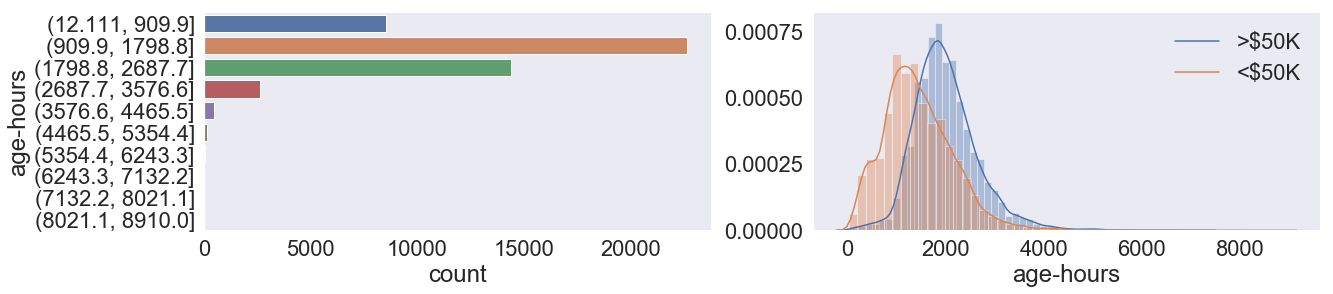

In [213]:
dataset_con["age-hours"] = dataset_con["age"] * dataset_con["hours-per-week"]
dataset_bin["age-hours"] = pd.cut(dataset_con["age-hours"], 10)

fig = plt.figure(figsize = (20, 4))

plt.subplot(121)
sns.countplot(y = "age-hours", data = dataset_bin)

plt.subplot(122)
sns.distplot(dataset_con.loc[dataset_con["predclass"] == 1]["age-hours"], kde_kws = {"label": ">$50K"})
sns.distplot(dataset_con.loc[dataset_con["predclass"] == 0]["age-hours"], kde_kws = {"label": "<$50K"})
